In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [18]:
df

,MFLOPS(N= 100): 2429.709
0,MFLOPS(N= 200): 9468.275
1,MFLOPS(N= 300): 23602.761
2,MFLOPS(N= 400): 20019.397
3,MFLOPS(N= 500): 38708.236
4,MFLOPS(N= 750): 35566.339
5,MFLOPS(N=1000): 28185.080
6,MFLOPS(N=1250): 37940.577
7,MFLOPS(N=1500): 35048.643
8,MFLOPS(N=1750): 36924.238
9,MFLOPS(N=2000): 29157.806


In [41]:
file_path = './src/gpu_milan.txt'
df = pd.read_csv(file_path)

In [11]:
filename = glob.glob("./src/gpu.txt")

In [15]:
def load_data(filename):
    # the csv starts and ends with a | character which will be interpreted as columns -> skip them
    df = pd.read_csv(filename, sep="|")
    df = df.drop(df.columns[0], axis=1)
    df = df.drop(df.columns[-1], axis=1)
    columns = df.columns
    # columns start with whitespace which needs to be removed
    df.columns = [column.strip() for column in df.columns]
    #df2 = pd.read_csv(filename_clang, skiprows=index_start)
    return df

In [17]:
df.columns

Index(['MFLOPS(N= 100): 2429.709'], dtype='object')

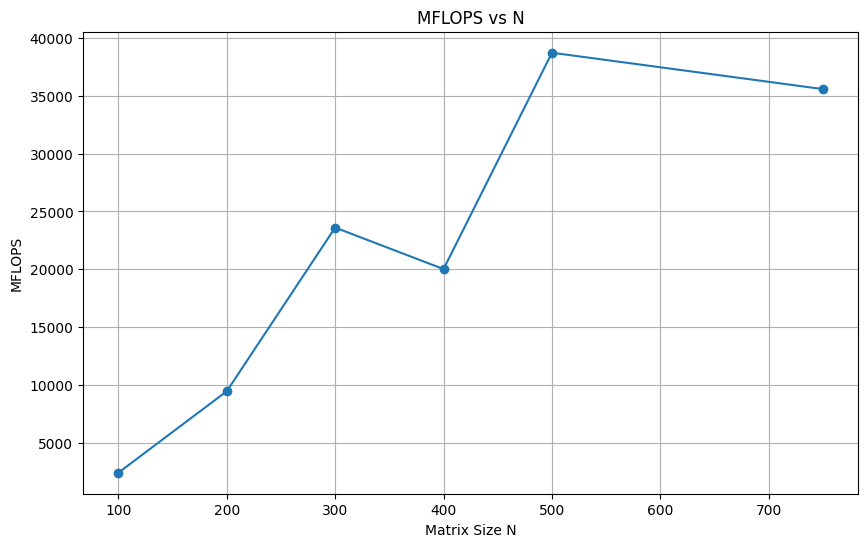

In [20]:
df = pd.read_table(file_path, header=None, names=['Description', 'MFLOPS'], sep=' ')

# Extract the numeric values from the 'Description' column
df['N'] = df['Description'].str.extract(r'(\d+)').astype(int)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['N'], df['MFLOPS'], marker='o', linestyle='-')
plt.title('MFLOPS vs N')
plt.xlabel('Matrix Size N')
plt.ylabel('MFLOPS')
plt.grid(True)
plt.show()

In [49]:
data = {
    'MatrixSize_N' : [100,200,300,400,500,750,1000,1250,1500,1750,2000,2500,3000,3500,4000],
    'MFLOPS' : [7008.334,
29235.067,
63272.952,
91139.204,
71711.777,
88440.111,
93089.329,
94024.213,
95692.315,
89674.545,
92910.170,
91576.495,
92971.094,
91020.570,
93524.970]
}

In [50]:
df = pd.DataFrame(data)

In [51]:
df

,MatrixSize_N,MFLOPS
0,100,7008.334
1,200,29235.067
2,300,63272.952
3,400,91139.204
4,500,71711.777
5,750,88440.111
6,1000,93089.329
7,1250,94024.213
8,1500,95692.315
9,1750,89674.545


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


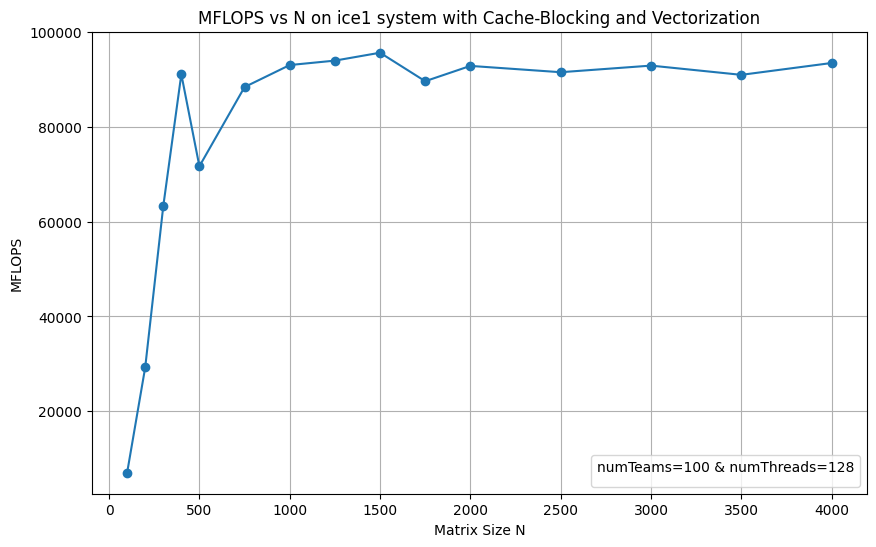

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(df['MatrixSize_N'], df['MFLOPS'], marker='o', linestyle='-')
plt.title('MFLOPS vs N on ice1 system with Cache-Blocking and Vectorization')
plt.xlabel('Matrix Size N')
plt.ylabel('MFLOPS')
plt.grid(True)
plt.legend(title="numTeams=100 & numThreads=128")
plt.savefig(f"./report/3a.png", dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


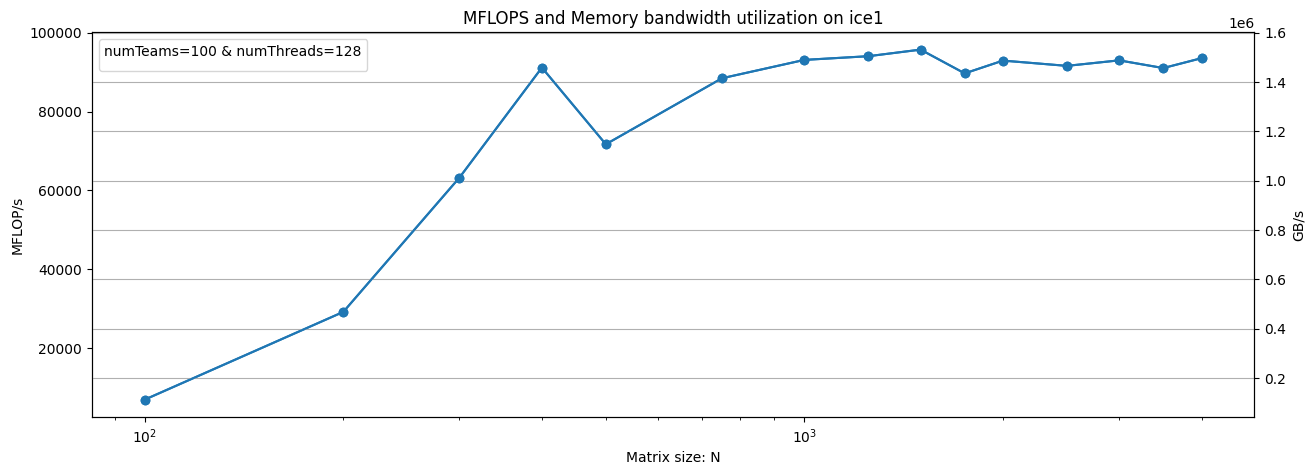

In [59]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
machine="ice1"
x="MatrixSize_N"
y="MFLOPS"
ax.set_xscale("log") #.xscale("log")
ax.set_xlabel("Matrix size: N")
second_y_axis = df["MFLOPS"].apply(lambda x: x*16)
ax.plot(df[x], df[y], **{'marker': 'o'})
# add another plot with df2 data
ax.set_ylabel("MFLOP/s")
ax2.plot(df[x], second_y_axis, **{'marker': 'o'})
ax2.set_ylabel("GB/s")

    #ax.legend(filename_to_legend_ex04(filenames))
#ax.legend(list(map(lambda x: os.path.basename(x)[:-4], filenames)))

plt.title(f"MFLOPS and Memory bandwidth utilization on ice1")
#plt.savefig(f"{os.path.dirname(filename)}/ex05_{machine}_teams.png", dpi=300)
#plt.savefig(f"finished/ex07/ex07_multi.png", dpi=300)
plt.grid()
plt.legend(title="numTeams=100 & numThreads=128")
plt.savefig(f"./report/3a_memory_bw.png")
plt.show()

In [60]:
import os

In [107]:
directory = "./src/3b_results_simd"
df_combined = pd.DataFrame(columns=['N', 'MFLOPS'])

In [108]:
data = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):  # Assuming your files have a .txt extension
        file_path = os.path.join(directory, filename)

        # Read the text file into a DataFrame
        with open(file_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                # Extract N_label and MFLOPS values from the line
                parts = line.strip().split(':')
                if len(parts) == 2:
                    N_label = parts[0].strip()
                    MFLOPS = float(parts[1].strip())
                    team_threads = filename[14:]
                    # Append the entry to the list
                    data.append({'N_label': N_label, 'MFLOPS': MFLOPS, 'filename': filename})

# Create a DataFrame from the list of entries
df_combined = pd.DataFrame(data)

# Display the combined DataFrame
print(df_combined)

            N_label      MFLOPS                  filename
0    MFLOPS(N=1750)  102255.161  gpu_3b_N1750_64_1024.txt
1    MFLOPS(N=1750)  156879.171  gpu_3b_N1750_104_512.txt
2    MFLOPS(N=1750)   19489.051    gpu_3b_N1750_48_32.txt
3    MFLOPS(N=1750)   44844.757   gpu_3b_N1750_32_128.txt
4    MFLOPS(N=1750)   98628.761  gpu_3b_N1750_72_1024.txt
..              ...         ...                       ...
114  MFLOPS(N=1750)   36583.668    gpu_3b_N1750_48_64.txt
115  MFLOPS(N=1750)   63823.146    gpu_3b_N1750_88_64.txt
116  MFLOPS(N=1750)   29206.227  gpu_3b_N1750_16_1024.txt
117  MFLOPS(N=1750)  116045.020  gpu_3b_N1750_120_128.txt
118  MFLOPS(N=1750)    7249.177     gpu_3b_N1750_8_80.txt

[119 rows x 3 columns]


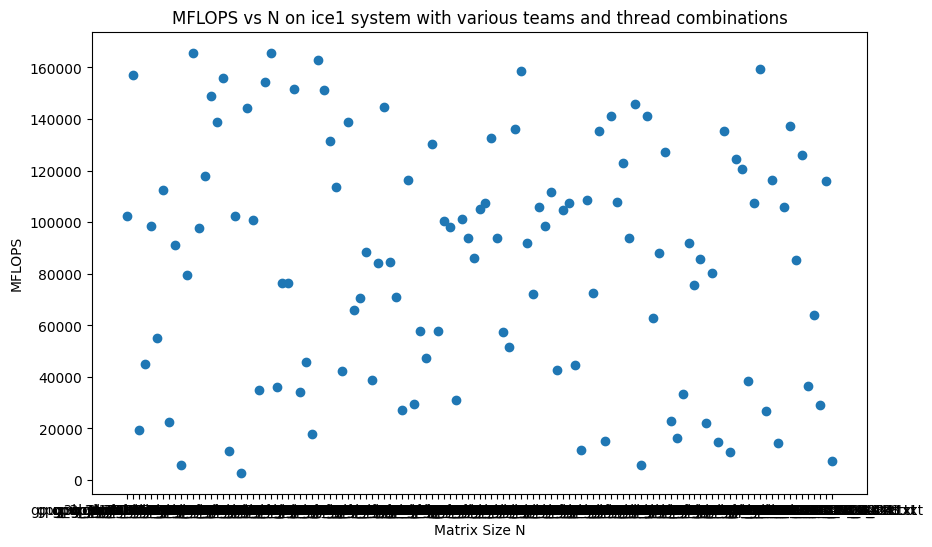

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['filename'], df_combined['MFLOPS'], marker='o', linestyle='-')
plt.title('MFLOPS vs N on ice1 system with various teams and thread combinations')
plt.xlabel('Matrix Size N')
plt.ylabel('MFLOPS')
#plt.grid(True)
#plt.legend(title="numTeams=100 & numThreads=128")
#plt.savefig(f"./report/3a.png", dpi=300)
plt.show()

In [110]:
max_flops = df_combined['MFLOPS'].max()
max_flops

165726.688

In [111]:
max_index = df_combined['MFLOPS'].idxmax()
max_row = df_combined.loc[max_index]
max_row

N_label              MFLOPS(N=1750)
MFLOPS                   165726.688
filename    gpu_3b_N1750_512_80.txt
Name: 11, dtype: object

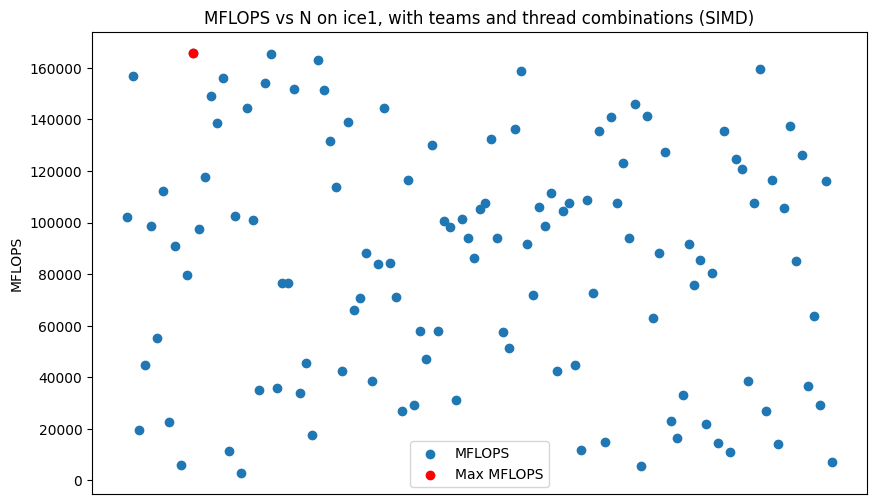

In [112]:
max_index = df_combined['MFLOPS'].idxmax()

plt.figure(figsize=(10, 6))

# Plot all points
plt.scatter(df_combined['filename'], df_combined['MFLOPS'], marker='o', label='MFLOPS')

# Highlight the point with the highest y-value
plt.scatter(df_combined.loc[max_index, 'filename'], df_combined.loc[max_index, 'MFLOPS'], color='red', marker='o', label='Max MFLOPS')

plt.title('MFLOPS vs N on ice1, with teams and thread combinations (SIMD)')
#plt.xlabel('Matrix Size N')
plt.ylabel('MFLOPS')
plt.xticks([])
plt.legend()
plt.savefig("./report/3b_simd2.png")
plt.show()